In [1]:
# Import packages from Python standard library
import numpy as np
import pandas as pd
import re
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [11]:
branches = pd.read_csv('../cpl_project/can-summer-2023/data/clean/branch_metrics.csv')
branches = branches[(branches['VISITORS'] > 0) & (branches['COMPUTER_SESSIONS'] > 0)]
branches


,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0
...,...,...,...,...,...,...
11875,Wrightwood-Ashburn,2022,12,575.0,511.0,1410.0
11876,Wrightwood-Ashburn,2023,1,658.0,577.0,1625.0
11877,Wrightwood-Ashburn,2023,2,683.0,561.0,12146.0
11878,Wrightwood-Ashburn,2023,3,834.0,806.0,6312.0


## Comparsion of %'s of Computer Sessions / Visitors

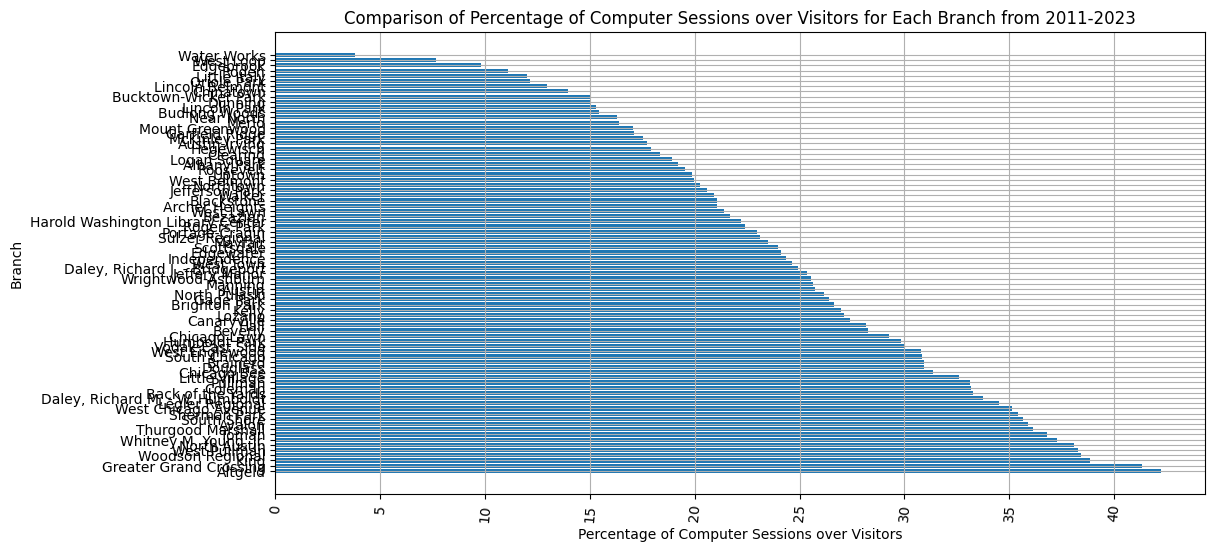

In [12]:
# Calculate the sum of Computer Sessions and sum of Visitors from all years
branch_metrics = branches.groupby('BRANCH').agg({'COMPUTER_SESSIONS': 'sum', 'VISITORS': 'sum'})

# Adding a column that calculates the Computer Session Percentage (computer sessions/visitors)*100
branch_metrics['COMPUTER_SESSION_PERCENTAGE'] = (branch_metrics['COMPUTER_SESSIONS'] / branch_metrics['VISITORS']) * 100

# Sort percentages of Computer Sessions from greatest to least
branch_metrics_sorted = branch_metrics.sort_values('COMPUTER_SESSION_PERCENTAGE', ascending=False)

# Plot 
plt.figure(figsize=(12, 6))
plt.barh(branch_metrics_sorted.index, branch_metrics_sorted['COMPUTER_SESSION_PERCENTAGE'])
plt.xlabel('Percentage of Computer Sessions over Visitors')
plt.ylabel('Branch')
plt.title('Comparison of Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
plt.xticks(rotation=85)
plt.grid(True)
plt.show()

Explanation For Above Graph:
- This graph sums up all of the Computer Sessions and sums up the Visitors from each branch for all years.
- Then, it creates a new column that displays the values when dividing (sum of Computer Sessions/sum of Visitors)*100 and sorts them from greatest to least

In [13]:
# New Dataframe with all branches that includes the "Computer Session Percentage" column
branches_cp = branches
branches_cp['COMPUTER_SESSION_PERCENTAGE'] = (branches['COMPUTER_SESSIONS'] / branches['VISITORS']) * 100

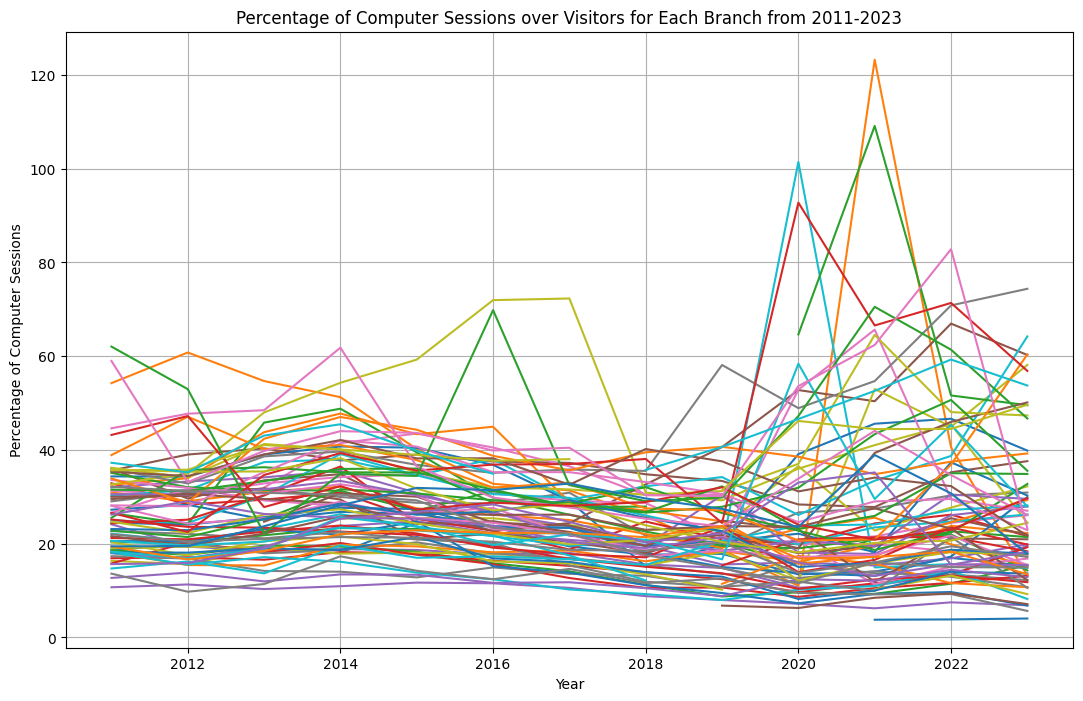

In [14]:
branch_cp = branches.groupby(['BRANCH', 'YEAR'])['COMPUTER_SESSION_PERCENTAGE'].mean().unstack()
plt.figure(figsize=(13, 8))
for branch in branch_cp.index:
    plt.plot(branch_cp.columns, branch_cp.loc[branch], label=branch)
plt.xlabel('Year')
plt.ylabel('Percentage of Computer Sessions')
plt.title('Percentage of Computer Sessions over Visitors for Each Branch from 2011-2023')
#plt.legend()
plt.grid(True)
plt.show()

Explanation For Above Graph:
- First, I created a new DataFrame that includes an additional column for the Computer Session Percentage